# Bank Customer Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
bc=pd.read_csv(r"C:\Users\akash\Downloads\Bank_customer_churn_outside.csv")
bc.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
bc.shape

(245725, 11)

In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
bc.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
bc.isnull().sum()[bc.isnull().sum()*100/bc.shape[0]>50]

Series([], dtype: int64)

In [7]:
bc.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [8]:
bc.Credit_Product=bc.Credit_Product.fillna('No')

In [9]:
bc.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
bc[bc.select_dtypes(include=['object']).columns]=bc[bc.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [13]:
bc.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,73,18,1,2,43,0,1045696,0,0
1,131013,0,30,27,2,0,32,0,581988,0,0
2,121520,0,56,18,3,2,26,0,1484315,1,0
3,57273,1,34,20,2,0,19,0,470454,0,0
4,209602,0,30,32,2,0,33,0,886787,0,0


In [14]:
bc=bc.drop('ID',axis=1)

In [15]:
bc.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
bc_train,bc_test=train_test_split(bc,test_size=0.3)

In [18]:
bc_train_y=bc_train.iloc[:,-1]
bc_train_x=bc_train.iloc[:,0:-1]
bc_test_y=bc_test.iloc[:,-1]
bc_test_x=bc_test.iloc[:,0:-1]

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
ran_bc=RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced',max_depth=10,min_samples_split=4)

In [73]:
ran_bc.fit(bc_train_x,bc_train_y)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=4)

In [74]:
pred_bc=ran_bc.predict(bc_test_x)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(bc_test_y,pred_bc)

array([[38930, 17252],
       [ 4445, 13091]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(bc_test_y,pred_bc)*100               #Accuracy


70.56756830082205

In [78]:
from sklearn.metrics import recall_score            #Recall
recall_score(bc_test_y,pred_bc)*100
 

74.65214416058394

In [79]:
from sklearn.metrics import precision_score
precision_score(bc_test_y,pred_bc)*100                 #Precision


43.14339386349405

In [80]:
from sklearn.metrics import f1_score
f1_score(bc_test_y,pred_bc)*100                      #F1 Score


54.68368178115666

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(bc_test_y,pred_bc)*100


71.97240008570296

In [86]:
from sklearn.metrics import roc_curve

In [87]:
pred_prob_bc=ran_bc.predict_proba(bc_test_x)
pred_prob_bc

array([[0.27105689, 0.72894311],
       [0.12823625, 0.87176375],
       [0.28344934, 0.71655066],
       ...,
       [0.75912401, 0.24087599],
       [0.2909214 , 0.7090786 ],
       [0.80533287, 0.19466713]])

In [88]:
pred_prob_bc[:,1]

array([0.72894311, 0.87176375, 0.71655066, ..., 0.24087599, 0.7090786 ,
       0.19466713])

In [89]:
fpr,tpr,ther=roc_curve(bc_test_y,pred_prob_bc[:,1])

Text(0.5, 0.5, 'AUROC score is 71.9')

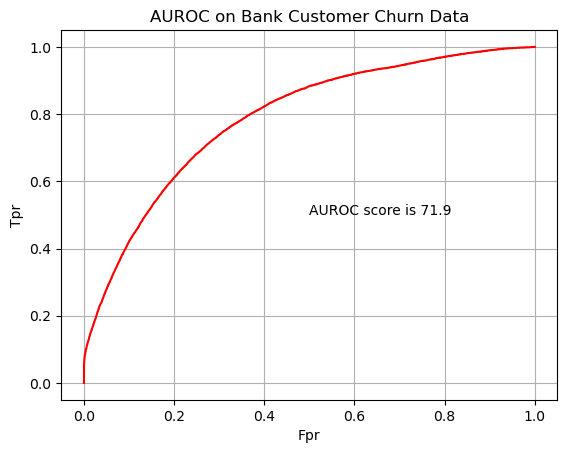

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on Bank Customer Churn Data')
plt.grid()
plt.text(x=0.5,y=0.5,s='AUROC score is 71.9')

# Feature Importance

In [91]:
fea_imp=pd.DataFrame({'feature':bc_train_x.columns,'Importance':ran_bc.feature_importances_})
fea_imp.sort_values('Importance',ascending=False)

,feature,Importance
5,Vintage,0.278845
4,Channel_Code,0.265622
1,Age,0.220600
3,Occupation,0.077919
6,Credit_Product,0.048567
8,Is_Active,0.042536
7,Avg_Account_Balance,0.037718
2,Region_Code,0.022921
0,Gender,0.005271
